# Programming Exercise 7: K-means Clustering 

## Introduction

In this exercise, you will implement the K-means clustering algorithm and apply it to compress an image. In the second part, you will use principal component analysis to find a low-dimensional representation of face images. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. We have included one function for you in this exercise: 

- runkMeans

You only have to implement these two functions:

- computeCentroids
- findClosestCentroids

The contained files are found in File ==> Open or in the readonly section of Assignment7a in the home page. We highly recommend that you take a look at them as you make progress in this exercise. 

### NOTE:

You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

Instructions will be provided as needed in the exercise. 


#### When you are done and submit the assignment, click here to check your [submission](https://www.coursera.org/learn/machine-learning/programming/CKQTU/k-means-clustering). 



K-means Clustering
====================

In this this exercise, you will implement the $K$-means algorithm and
use it for image compression. You will first start on an example 2D
dataset that will help you gain an intuition of how the $K$-means
algorithm works. After that, you wil use the $K$-means algorithm for
image compression by reducing the number of colors that occur in an
image to only those that are most common in that image. 

Implementing K-means
----------------------

The K-means algorithm is a method to automatically cluster similar
data examples together. Concretely, you are given a training set
$\{x^{(1)}, ..., x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), and want
to group the data into a few cohesive “clusters”. The intuition behind
$K$-means is an iterative procedure that starts by guessing the initial
centroids, and then refines this guess by repeatedly assigning examples
to their closest centroids and then recomputing the centroids based on
the assignments.

The $K$-means algorithm is as follows:

``` {frame="single"}
% Initialize centroids
centroids = kMeansInitCentroids(X, K);
for iter = 1:iterations
    % Cluster assignment step: Assign each data point to the 
    % closest centroid. idx(i) corresponds to c^(i), the index
    % of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids);

    % Move centroid step: Compute means based on centroid 
    % assignments
    centroids = computeMeans(X, idx, K);
end
```

The inner-loop of the algorithm repeatedly carries out two steps: (i)
Assigning each training example $x^{(i)}$ to its closest centroid, and
(ii) Recomputing the mean of each centroid using the points assigned to
it. The $K$-means algorithm will always converge to some final set of
means for the centroids. Note that the converged solution may not always
be ideal and depends on the initial setting of the centroids. Therefore,
in practice the $K$-means algorithm is usually run a few times with
different random initializations. One way to choose between these
different solutions from different random initializations is to choose
the one with the lowest cost function value (distortion).

You will implement the two phases of the $K$-means algorithm separately
in the next sections. You will start by completing *findClosestCentroid* and then proceed to complete *computeCentroids*.

### Finding closest centroids

In the “cluster assignment” phase of the $K$-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. Specifically, for
every example $i$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where $c^{(i)}$ is the index of the centroid that is closest to
$x^{(i)}$, and $\mu_j$ is the position (value) of the $j$’th centroid.
Note that $c^{(i)}$ corresponds to idx(i) in the starter code.

Your task is to complete the code in findClosestCentroids. This
function takes the data matrix $X$ and the locations of all
centroids inside centroids and should output a one-dimensional
array idx that holds the index (a value in $\{1,...,K\}$, where
$K$ is total number of centroids) of the closest centroid to every
training example.

You can implement this using a loop over every training example and
every centroid.
Once you have completed the code in findClosestCentroids, run your code and you should see the output
[1 3 2] corresponding to the centroid assignments for the first 3
examples.

**Implementation**:

idx = **findClosestCentroids**(X, centroids) returns the closest centroids in idx for a dataset $X$ where each row is a single example. idx = m x 1  vector of centroid assignments (i.e. each entry in range $[1..K]$)

Instructions: Go over every example, find its closest centroid, and store the index inside idx at the appropriate location. Concretely, idx(i) should contain the index of the centroid closest to example i. Hence, it should be a value in the range $1..K$

**Note:** You can use a for-loop over the examples to compute this.


In [86]:
% GRADED FUNCTION: findClosestCentroids
function idx = findClosestCentroids(X, centroids)

K = size(centroids, 1);            % Set K
idx = zeros(size(X,1), 1);         % Return the following variable correctly.

% ====================== YOUR CODE HERE ======================
m = size(X,1);
for i = 1:K
    centroid_mat(:,:,i) = centroids(i,:) - X;
end
diff_sq = centroid_mat .^ 2;
dist = sqrt(sum(diff_sq,2));
dist = reshape (dist, m, K);
[~, idx] = min(dist,[],2);

% =============================================================
end

In [87]:
warning('off'); addpath('../../readonly/Assignment7a/');
load('ex7data2.mat');                % Load an example dataset that we will be using
K = 3;                               % Select an initial set of centroids (3 Centroids)
initial_centroids = [3 3; 6 2; 8 5];

idx = findClosestCentroids(X, initial_centroids);       % find closest centroids using initial_centroids
idx(1:3)

ans =

   1
   3
   2



**Expected Output**: 

1 3 2 

### Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it. Specifically, for every centroid $k$ we set
$$\mu_k := \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ where $C_k$ is the
set of examples that are assigned to centroid $k$. Concretely, if two
examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

You should now complete the code in the function computeCentroids below. You can
implement this function using a loop over the centroids. You can also
use a loop over the examples; but if you can use a vectorized
implementation that does not use such a loop, your code may run faster.

Once you have completed the function computeCentroids below, you should run the cell below
to output the centroids after
the first step of $K$-means.

**Implementation**: 

centroids = **computeCentroids(X, idx, K)** returns the new centroids by computing the means of the data points assigned to each centroid. It is given a dataset X where each row is a single data point, a vector idx of centroid assignments (i.e. each entry in range [1..K]) for each example, and K, the number of centroids. You should return a matrix centroids, where each row of centroids is the mean of the data points assigned to it.



In [88]:
% GRADED FUNCTION: computeCentroids
function centroids = computeCentroids(X, idx, K)

[m n] = size(X);                 % Useful variables
centroids = zeros(K, n);         % Return the following variable correctly.

% ====================== YOUR CODE HERE ======================
categories = eye(K)(idx,:)';
count = sum (categories, 2);
total = (categories * X);
centroids = total ./ count;

% sum_vec = zeros(K,n);
% count_vec = zeros(K,1);
% whos
% for x = 1:m
%     i = idx(x);
%     sum_vec(i,:) = sum_vec(i,:) + X(i, :);
%     count_vec(i) = count_vec(i) + 1;
% end
% count_vec(count_vec < 1) = 1;
% count_vec = repmat(count_vec,1,2);
% centroids = sum_vec./count_vec;

% =============================================================
end


In [89]:
% Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K); 

centroids'


ans =

   2.4283   5.8135   7.1194
   3.1579   2.6337   3.6167



**Expected Output**: 

 2.4283   5.8135   7.1194
 
 3.1579   2.6337   3.6167

# K-means on example Dataset 

<img src="../../readonly/Assignment7a/figure 1.png" width="500" height="500">


After you have completed the two functions (*findClosestCentroids*
and *computeCentroids*), the next step will run the
$K$-means algorithm on a toy 2D dataset to help you understand how
$K$-means works. We encourage you to take a look at the
function to understand how it works. Notice that the code calls the two
functions you implemented in a loop.

When you run the next step, the $K$-means code will produce a
visualization that steps you through the progress of the algorithm at
each iteration. Run the second cell below multiple times to see how each step of the
$K$-means algorithm changes the centroids and cluster assignments. At
the end, your figure should look like the one displayed in Figure 1.

In [90]:
global max_iters = 1;                             % Keep track of which iteration you are on

Running K-Means clustering on iteration number 10.


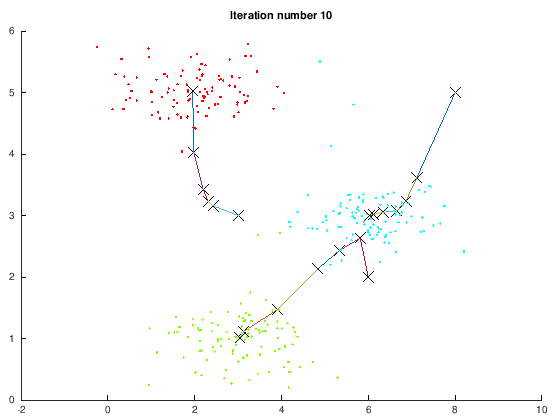

In [91]:
fprintf('Running K-Means clustering on iteration number %d.\n',max_iters);

% Load an example dataset
load('ex7data2.mat');
initial_centroids = [3 3; 6 2; 8 5];
K = 3;
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, true);
max_iters++;

Random initialization
---------------------

The initial assignments of centroids for the example dataset was designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

In this part of the exercise, you should understand how the function
kMeansInitCentroids is implemented.

The code first randomly permutes the indices of the examples
(using *randperm*). Then, it selects the first $K$ examples based
on the random permutation of the indices. This allows the examples to be
selected at random without the risk of selecting the same example
twice.
 
centroids = **kMeansInitCentroids**(X, K) returns K initial centroids to be used with the K-Means on the dataset X.

In [92]:
function centroids = kMeansInitCentroids(X, K)

centroids = zeros(K, size(X, 2));    % Return this value correctly

% ====================== YOUR CODE HERE ======================
rand_idx = randperm(size(X, 1));
centroids = X(rand_idx(1:K), :);

% =============================================================
end

Image compression with $K$-means
--------------------------------

<img src="../../readonly/Assignment7a/figure 2.png" width="500" height="500">



Now, you will apply $K$-means to image compression. In a
straightforward 24-bit color representation of an image, each pixel
is represented as three 8-bit unsigned integers (ranging from 0 to 255)
that specify the red, green and blue intensity values. This encoding is
often refered to as the RGB encoding. Our image contains thousands of
colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.

By making this reduction, it is possible to represent (compress) the
photo in an efficient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.


### $K$-means on pixels

In Octave/MATLAB, images can be read in as follows:


``` {frame="single"}
% Load 128x128 color image (bird_small.png)
A = imread('bird_small.png');

% You will need to have installed the image package to used
% imread. If you do not have the image package installed, you
% should instead change the following line to
% 
%   load('bird_small.mat'); % Loads the image into the variable A
```

This creates a three-dimensional matrix A whose first two indices
identify a pixel position and whose last index represents red, green, or
blue. For example, A(50, 33, 3) gives the blue intensity of the
pixel at row 50 and column 33.

The code first loads the image, and then reshapes it
to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$), and calls your $K$-means function on it.

After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
findClosestCentroids function. This allows you to represent the
original image using the centroid assignments of each pixel. Notice that
you have significantly reduced the number of bits that are required to
describe the image. The original image required 24 bits for each one of
the $128\times128$ pixel locations, resulting in total size of
$128 \times 128 \times 24 = 393,216$ bits. The new representation
requires some overhead storage in form of a dictionary of 16 colors,
each of which require 24 bits, but the image itself then only requires 4
bits per pixel location. The final number of bits used is therefore
$16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which
corresponds to compressing the original image by about a factor of 6.

<img src="../../readonly/Assignment7a/figure 3.png" width="700" height="700">



Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. Specifically, you can
replace each pixel location with the mean of the centroid assigned to
it. Figure 3 shows the reconstruction we obtained.
Even though the resulting image retains most of the characteristics of
the original, we also see some compression artifacts.


** Implementation**: 

In this exercise, you will use K-Means to compress an image. To do this, you will first run K-Means on the colors of the pixels in the image and then you will map each pixel on to it's closest centroid.

Note: If imread does not work for you, you can try instead load ('bird_small.mat');. This might take 1 minute to train. 

In [93]:
A = double(imread("../../readonly/Assignment7a/bird_small.png"));         %  Load an image of a bird

%A = load('bird_small.mat');
A = A / 255;                                  %  Divide by 255 so that all values are in the range 0 - 1
img_size = size(A)                           %  Size of the image

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

K = 16;                        % Run your K-Means algorithm on this data
max_iters = 10;                % You should try different values of K and max_iters here

initial_centroids = kMeansInitCentroids(X, K); % Using the function you have implemented above. 

[centroids, idx] = runkMeans(X, initial_centroids, max_iters);  % Run K-Means

img_size =

   128   128     3



Finally we will proceed to compress the image: 

In the code below we use closest clusters for each example. After that, we represent the image X as in terms of the indices in idx. We then recover the image from the indices (idx) by mapping each pixel (specified by it's index in idx) to the centroid value. Finally we reshape the recovered image into proper dimensions. This could take 1-2 minutes to run. 

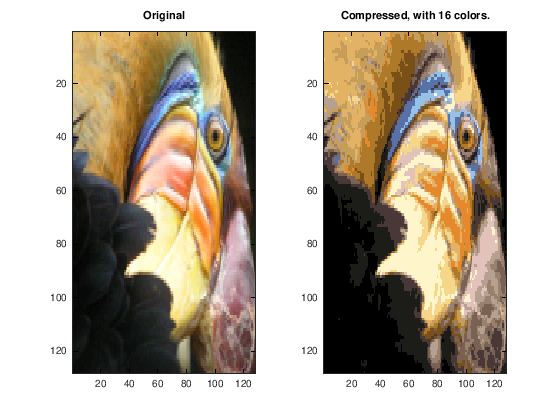

In [94]:
idx = findClosestCentroids(X, centroids);   % Find closest cluster members
X_recovered = centroids(idx,:);             % Represent Image in terms of indices

X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);  % Reshape recovered image into proper dimensions

subplot(1, 2, 1);                           % Display the original image 
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));

Optional (ungraded) exercise: Use your own image
------------------------------------------------

In this exercise, modify the code we have supplied to run on one of your
own images. Note that if your image is very large, then $K$-means can
take a long time to run. Therefore, we recommend that you resize your
images to managable sizes before running the code. You can also try to
vary $K$ to see the effects on the compression.

In [95]:
% Compress your own image below !!

